# Linear Regression

https://www.youtube.com/watch?v=V59bYfIomVk&index=7&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v

$$y = mx +b$$

In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

%matplotlib inline

## Setting some data

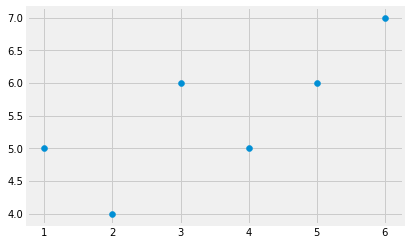

In [2]:
xs = [1,2,3,4,5,6]
ys = [5,4,6,5,6,7]

plt.scatter(xs,ys)

## Defining sets as arrays

In [3]:
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

$$m = \frac{\bar{x}\bar{y} - \bar{xy}}{\bar{x}^2 - \bar{x^2}}$$ and $$b = \bar{y} - m\bar{x}$$

## Function to calculate Slope and Intercept

In [4]:
def best_fit_slope_and_intercept(xs,ys):
    m = ((mean(xs) * mean(ys) - mean(xs * ys)) / 
         (mean(xs)**2 - mean(xs**2)))
    
    b = mean(ys) - m * mean(xs)
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)
print(m,b)

0.42857142857142866 4.0


## Regression Line

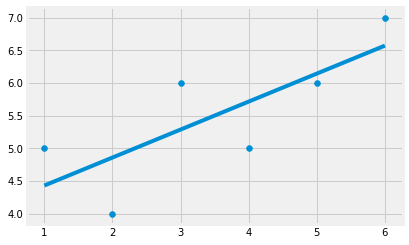

In [5]:
regression_line = [(m * x) + b for x in xs]
plt.scatter(xs,ys)
plt.plot(xs, regression_line)

## Prediction

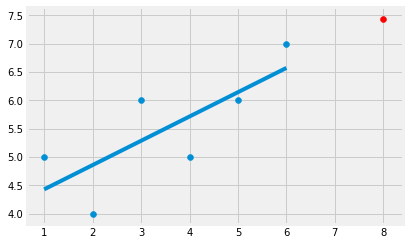

In [6]:
predict_x = 8
predict_y = (m * predict_x) + b

plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y, color='r')
plt.plot(xs, regression_line)

## Squared error

$$SE = (predicted-real)^2$$

In [7]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)

## Coefficient of determination

$$r^2 = 1 - \frac{SE \hat{y}}{SE \bar{y}}$$

In [8]:
def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - squared_error_regr / squared_error_y_mean

In [9]:
r_squared = coefficient_of_determination(ys, regression_line)
r_squared

0.5844155844155845

## Testing Assumptions

In [10]:
def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

r^2 = 0.9290526520075071


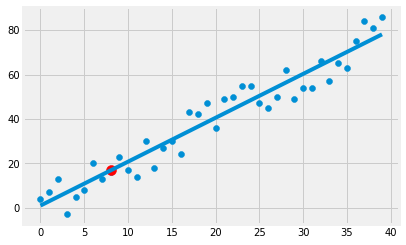

In [11]:
xs, ys = create_dataset(40, 10, 2, correlation='pos') #Change to test differents results

m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m * x) + b for x in xs]

predict_x = 8
predict_y = (m * predict_x) + b

r_squared = coefficient_of_determination(ys, regression_line)
print("r^2 =",r_squared)

plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.scatter(predict_x,predict_y, s=100, color='r')